In [1]:
import h5py
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install obspy

     |████████████████████████████████| 24.7MB 119kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for obspy: filename=obspy-1.2.2-cp37-cp37m-linux_x86_64.whl size=21668066 sha256=402274c43a8d1757908ecf23ab71f72b0184d295730d1c70bed5a706bb8adfb4
  Stored in directory: /root/.cache/pip/wheels/94/e0/86/44fd4cea7661f42431c8f6d030f2758ff275cccffcbe8fa2b8
Successfully built obspy


In [ ]:
import obspy
import h5py
from obspy import UTCDateTime
import numpy as np
from obspy.clients.fdsn.client import Client
import matplotlib.pyplot as plt

In [ ]:
def make_stream(dataset):
    '''
    input: hdf5 dataset
    output: obspy stream

    '''
    data = np.array(dataset)

    tr_E = obspy.Trace(data=data[:, 0])
    tr_E.stats.starttime = UTCDateTime(dataset.attrs['trace_start_time'])
    tr_E.stats.delta = 0.01
    tr_E.stats.channel = dataset.attrs['receiver_type']+'E'
    tr_E.stats.station = dataset.attrs['receiver_code']
    tr_E.stats.network = dataset.attrs['network_code']

    tr_N = obspy.Trace(data=data[:, 1])
    tr_N.stats.starttime = UTCDateTime(dataset.attrs['trace_start_time'])
    tr_N.stats.delta = 0.01
    tr_N.stats.channel = dataset.attrs['receiver_type']+'N'
    tr_N.stats.station = dataset.attrs['receiver_code']
    tr_N.stats.network = dataset.attrs['network_code']

    tr_Z = obspy.Trace(data=data[:, 2])
    tr_Z.stats.starttime = UTCDateTime(dataset.attrs['trace_start_time'])
    tr_Z.stats.delta = 0.01
    tr_Z.stats.channel = dataset.attrs['receiver_type']+'Z'
    tr_Z.stats.station = dataset.attrs['receiver_code']
    tr_Z.stats.network = dataset.attrs['network_code']

    stream = obspy.Stream([tr_E, tr_N, tr_Z])

    return stream

In [ ]:
 def make_plot(tr, title='', ylab=''):
    '''
    input: trace
    
    '''
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(tr.times("matplotlib"), tr.data, "k-")
    ax.xaxis_date()
    fig.autofmt_xdate()
    plt.ylabel('counts')
    plt.title('Noise Data')
    plt.show()
    

In [ ]:
import pandas as pd
import numpy as np
def getSamples(fileName, setStart, setEnd, startIndex, endIndex):
  # fileName: like 'drive/Shareddrives/anomalyResearch/chunk1/chunk1.hdf5'
  # setStart: start index of dataset chosen
  # setEnd: end index of dataset chosen
  # startIndex: start position of choosen slide window
  # endIndex: end position of choosen slide window
  file_name = fileName
  dtf1 = h5py.File(file_name,'r')
  data_group = dtf1["data"]

  data_keys = list(data_group.keys())
  fileList = data_keys[setStart:setEnd]

  sample_list = []
  time_list = []
  for i in range(len(fileList)):
     sub_name = "data/" + fileList[i] + ""
     #print(sub_name)
     dataset = dtf1.get(sub_name)
     st = make_stream(dataset)
     #print(max(st[2]))
     st_list = list(st[2][startIndex:endIndex])
     sample_list.extend(st_list)
     #timestart = fileList[i][8:12] + "-" + fileList[i][12:14] + "-" + fileList[i][14:16] + " " + fileList[i][16:18] + ":" + fileList[i][18:20] + ":00" 
     #print(timestart)
     #time1 = np.datetime64(timestart, 'ms')
     #timeStamp = pd.date_range(time1, freq='10L', periods=6000).strftime("%Y-%m-%d %H:%M:%S").tolist()
     #time_list.extend(timeStamp[startIndex:endIndex])

  return sample_list



In [ ]:
fileName = 'drive/Shareddrives/anomalyResearch/chunk1/chunk1.hdf5'
setStart = 0
setEnd = 3
startIndex = 0
endIndex = 2
noise1 = getSamples(fileName=fileName, setStart=0, setEnd=3, startIndex=5000, endIndex=5010)
print(noise1)

[6.6244898, -1.3449394, -0.41118532, -0.66154402, -3.484406, -14.509155, -25.579422, -8.0577564, -19.661081, -44.592651, -191.21458, -187.3461, -135.70073, -66.111259, -20.429335, 28.120447, 53.136845, 44.633274, 12.450061, -26.214525, -49.169693, -70.850723, -68.348412, -43.235657, -35.110756, 7.4487643, 73.122826, 97.025818, 88.460655, 65.741852]


In [ ]:
noise_train = getSamples(fileName=fileName, setStart=0, setEnd=500, startIndex=1000, endIndex=2000)

In [ ]:
max(noise_train)

422.13263

In [ ]:
len(noise_train)

500000

In [ ]:
import pandas as pd

noise = pd.DataFrame({'timestamp':time_train,'value':noise_train})
noise.to_csv('drive/Shareddrives/anomalyResearch/noise_week4.csv',index = None ,encoding='gbk')

In [ ]:
import random
def getTests(noiseFile, normalFile, noise_set_start, noise_set_end, normal_set_start, normal_set_end, startIndex, endIndex):
  # fileName: like 'drive/Shareddrives/anomalyResearch/chunk1/chunk1.hdf5'
  # setStart: start index of dataset chosen
  # setEnd: end index of dataset chosen
  # startIndex: start position of choosen slide window
  # endIndex: end position of choosen slide window
  noise_file_name = noiseFile
  normal_file_name = normalFile
  dtf_noise = h5py.File(noise_file_name,'r')
  dtf_normal = h5py.File(normal_file_name,'r')
  data_group_noise = dtf_noise["data"]
  data_group_normal = dtf_normal["data"]

  noise_keys = list(data_group_noise.keys())
  normal_keys = list(data_group_normal.keys())

  noiseList = noise_keys[noise_set_start:noise_set_end]
  normalList = normal_keys[normal_set_start:normal_set_end]
  #fileList.extend(normalList)
  #random.shuffle(fileList)
  #print(fileList)

  

  noise_list1 = []
  noise_list2 = []
  normal_list1 = []
  normal_list2 = []
  test = []
  for i in range(int(len(noiseList)/2)):
     sub_name = "data/" + noiseList[i] + ""
     #print(sub_name)
     dataset = dtf_noise.get(sub_name)
     st = make_stream(dataset)
     #print(max(st[2]))
     st_list = list(st[2][startIndex:endIndex])
     noise_list1.extend(st_list)
     #timestart = fileList[i][8:12] + "-" + fileList[i][12:14] + "-" + fileList[i][14:16] + " " + fileList[i][16:18] + ":" + fileList[i][18:20] + ":00" 
     #print(timestart)
     #time1 = np.datetime64(timestart, 'ms')
     #timeStamp = pd.date_range(time1, freq='10L', periods=6000).strftime("%Y-%m-%d %H:%M:%S").tolist()
     #time_list.extend(timeStamp[startIndex:endIndex])

  for i in range(int(len(noiseList)/2),len(noiseList)):
     sub_name = "data/" + noiseList[i] + ""
     #print(sub_name)
     dataset = dtf_noise.get(sub_name)
     st = make_stream(dataset)
     #print(max(st[2]))
     st_list = list(st[2][startIndex:endIndex])
     noise_list2.extend(st_list)

  for i in range(int(len(normalList)/2)):
     sub1_name = "data/" + normalList[i] + ""
     #print(sub_name)
     dataset = dtf_normal.get(sub1_name)
     st = make_stream(dataset)
     #print(max(st[2]))
     st_list = list(st[2][startIndex:endIndex])
     normal_list1.extend(st_list)

  for i in range(int(len(normalList)/2),len(normalList)):
     sub2_name = "data/" + normalList[i] + ""
     #print(sub_name)
     dataset = dtf_normal.get(sub2_name)
     st = make_stream(dataset)
     #print(max(st[2]))
     st_list = list(st[2][startIndex:endIndex])
     normal_list2.extend(st_list)

  

  return noise_list1 + normal_list1 + noise_list2 + normal_list2

In [ ]:
fileNoise = 'drive/Shareddrives/anomalyResearch/chunk1/chunk1.hdf5'
fileNormal = 'drive/Shareddrives/anomalyResearch/chunk3/chunk3.hdf5'

test1 = getTests(noiseFile=fileNoise, normalFile=fileNormal, noise_set_start=0, noise_set_end=3, normal_set_start=0, normal_set_end=3, startIndex=0, endIndex=2)
print(test1)

[-0.0, -0.0048584584, 0.0, 5.615993e-05, -0.0, -0.01984749, 0.0, 0.011860459, 0.0, -9.2410301e-05, 0.0, -8.7196604e-05]


In [ ]:
fileNoise = 'drive/Shareddrives/anomalyResearch/chunk1/chunk1.hdf5'
fileNormal = 'drive/Shareddrives/anomalyResearch/chunk3/chunk3.hdf5'
test_samples = getTests(noiseFile=fileNoise, normalFile=fileNormal, noise_set_start=1001, noise_set_end=1101, normal_set_start=0, normal_set_end=10, startIndex=1000, endIndex=2000)
print(len(test_samples))


110000


In [ ]:
import pandas as pd
import numpy as np
timestart = "2015-01-01 00:00:00"
#time1 = np.datetime64('2015-01-01 00:00:00', 'ms')
#print(time1)
time_test = pd.date_range(timestart, freq='10L', periods=110000).strftime("%Y-%m-%d %H:%M:%S").tolist()
time_train = pd.date_range(timestart, freq='10L', periods=500000).strftime("%Y-%m-%d %H:%M:%S").tolist()
#print(len(time_test))
#print(time_test[999:1100])

In [ ]:
len(noise_train)
len(time_train)

500000

In [ ]:
import pandas as pd

train_data = pd.DataFrame({'timestamp':time_train,'value':noise_train})
train_data.to_csv('drive/Shareddrives/anomalyResearch/trainAuto_week4.csv',index = None ,encoding='gbk')

In [ ]:
test_data = pd.DataFrame({'timestamp':time_test,'value':test_samples})
test_data.to_csv('drive/Shareddrives/anomalyResearch/testAuto_week4.csv',index = None ,encoding='gbk')

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [ ]:
df_train_url = 'drive/Shareddrives/anomalyResearch/trainAuto_week4.csv'
df_test_url = 'drive/Shareddrives/anomalyResearch/testAuto_week4.csv'
df_small_noise = pd.read_csv(
    df_train_url, parse_dates=True, index_col="timestamp"
)[0:10000]
df_daily_jumpsup = pd.read_csv(
    df_test_url, parse_dates=True, index_col="timestamp"
)[47000:57000]

In [ ]:
def demoo(value):
    a=-100
    b=100
    k = (b-a)/(max(value)-min(value))
    return [a+k*(x-min(value)) for x in value]
if __name__ == '__main__':
    y=[0,10,0,1,3,4,5,6,9,9]
    #print(normalization(y))
    transform_value =demoo(y)
    print(transform_value)


[-1.0, 1.0, -1.0, -0.8, -0.3999999999999999, -0.19999999999999996, 0.0, 0.20000000000000018, 0.8, 0.8]


In [ ]:
def demoo(value):
    a=-100
    b=100
    k = (b-a)/(max(value)-min(value))
    return [a+k*(x-min(value)) for x in value]
if __name__ == '__main__':
    y_test = df_daily_jumpsup['value']
    #print(normalization(y))
    transform_test =demoo(y_test)
    #print(transform_value[0:2])
    #print(df_daily_jumpsup['value'][0:2])
    df_daily_jumpsup1 = df_daily_jumpsup.drop(['value'], axis=1)
    df_daily_jumpsup1.insert(0,'value',transform_test)
    
    y_train = df_small_noise['value']
    #print(normalization(y))
    transform_train =demoo(y_train)
    #print(transform_value[0:2])
    #print(df_daily_jumpsup['value'][0:2])
    df_small_noise1 = df_small_noise.drop(['value'], axis=1)
    df_small_noise1.insert(0,'value',transform_train)
    print(df_daily_jumpsup1[0:2])
    print(df_small_noise1[0:2])

                        value
timestamp                    
2015-01-01 00:07:50  4.263994
2015-01-01 00:07:50  7.034667
               value
timestamp           
2015-01-01 -7.331404
2015-01-01  0.177596


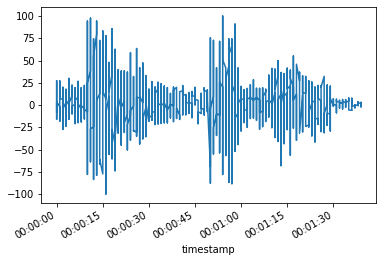

In [ ]:
fig, ax = plt.subplots()
df_small_noise1.plot(legend=False, ax=ax)
plt.show()

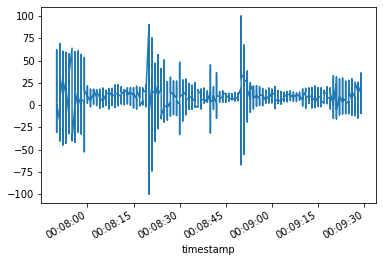

In [ ]:
fig, ax = plt.subplots()
df_daily_jumpsup1.plot(legend=False, ax=ax)
plt.show()

In [ ]:
# Normalize and save the mean and std we get,
# for normalizing test data.
training_mean = df_small_noise1.mean()
training_std = df_small_noise1.std()
df_training_value = (df_small_noise1 - training_mean) / training_std
print("Number of training samples:", len(df_training_value))

Number of training samples: 10000


In [ ]:
TIME_STEPS = 100

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_training_value.values)
print("Training input shape: ", x_train.shape)

Training input shape:  (9900, 100, 1)


In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 50, 32)            256       
_________________________________________________________________
dropout_18 (Dropout)         (None, 50, 32)            0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 25, 16)            3600      
_________________________________________________________________
conv1d_transpose_27 (Conv1DT (None, 50, 16)            1808      
_________________________________________________________________
dropout_19 (Dropout)         (None, 50, 16)            0         
_________________________________________________________________
conv1d_transpose_28 (Conv1DT (None, 100, 32)           3616      
_________________________________________________________________
conv1d_transpose_29 (Conv1DT (None, 100, 1)           

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
70/70 [==============================] - 3s 34ms/step - loss: 0.4029 - val_loss: 0.0046
Epoch 2/50
70/70 [==============================] - 2s 31ms/step - loss: 0.1144 - val_loss: 0.0026
Epoch 3/50
70/70 [==============================] - 2s 31ms/step - loss: 0.0799 - val_loss: 0.0016
Epoch 4/50
70/70 [==============================] - 2s 31ms/step - loss: 0.0660 - val_loss: 0.0014
Epoch 5/50
70/70 [==============================] - 2s 31ms/step - loss: 0.0578 - val_loss: 0.0013
Epoch 6/50
70/70 [==============================] - 2s 31ms/step - loss: 0.0523 - val_loss: 0.0015
Epoch 7/50
70/70 [==============================] - 2s 31ms/step - loss: 0.0482 - val_loss: 0.0016
Epoch 8/50
70/70 [==============================] - 2s 31ms/step - loss: 0.0448 - val_loss: 0.0023
Epoch 9/50
70/70 [==============================] - 2s 31ms/step - loss: 0.0421 - val_loss: 0.0026
Epoch 10/50
70/70 [==============================] - 2s 31ms/step - loss: 0.0397 - val_loss: 0.0031


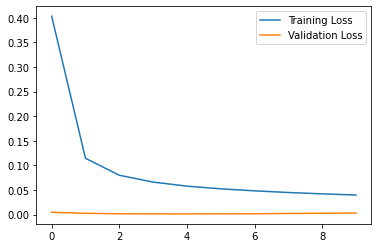

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

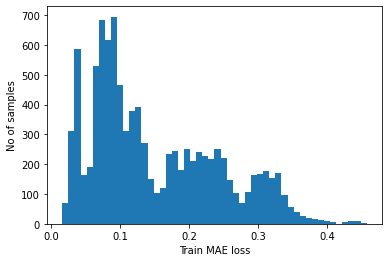

Reconstruction error threshold:  0.457271168166


In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

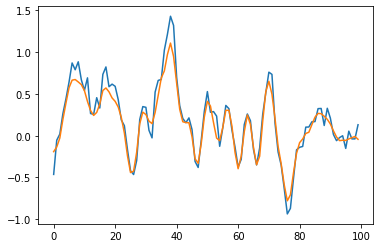

In [ ]:
# Checking how the first sequence is learnt
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()

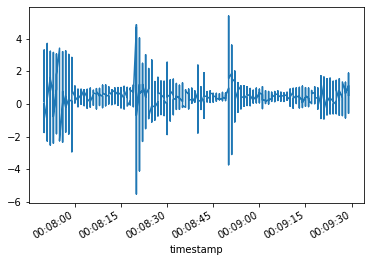

Test input shape:  (9900, 100, 1)


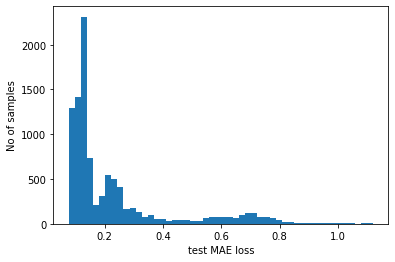

Number of anomaly samples:  1299
Indices of anomaly samples:  (array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
        121,  122,  123,  124,  125,  126,  127,  128,  129,  130,  131,
        132,  133,  134,  135,  136,  137,  138,  139,  140, 

In [ ]:
df_test_value = (df_daily_jumpsup1 - training_mean) / training_std
fig, ax = plt.subplots()
df_test_value.plot(legend=False, ax=ax)
plt.show()

# Create sequences from test values.
x_test = create_sequences(df_test_value.values)
print("Test input shape: ", x_test.shape)

# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
np.set_printoptions(threshold=np.inf)
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))
#print(np.where(anomalies))

In [ ]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_test_value) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

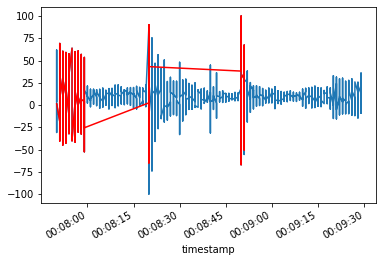

In [ ]:
df_subset = df_daily_jumpsup1.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
df_daily_jumpsup1.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()

In [ ]:
df_train_url = 'drive/Shareddrives/anomalyResearch/trainAuto_week4.csv'
df_test_url = 'drive/Shareddrives/anomalyResearch/testAuto_week4.csv'
df_small_noise = pd.read_csv(
    df_train_url, parse_dates=True, index_col="timestamp"
)[0:10000]
df_daily_jumpsup = pd.read_csv(
    df_test_url, parse_dates=True, index_col="timestamp"
)[47000:57000]

In [ ]:
df_train_url = 'drive/Shareddrives/anomalyResearch/noise_millesecond.csv'
#df_test_url = 'drive/Shareddrives/anomalyResearch/testAuto_week4.csv'
df_small_noise = pd.read_csv(
    df_train_url, parse_dates=True, index_col="timestamp"
)
print(len(df_small_noise))

6000


In [ ]:
df_new =  df_small_noise[0:4000]
df_noise = df_new.append(df_small_noise)
print(len(df_noise))

10000


In [ ]:
def demoo(value):
    a=-100
    b=100
    k = (b-a)/(max(value)-min(value))
    return [a+k*(x-min(value)) for x in value]
if __name__ == '__main__':
    y_train = df_noise['value']
    #print(normalization(y))
    transform_train =demoo(y_train)
    #print(transform_value[0:2])
    #print(df_daily_jumpsup['value'][0:2])
    df_noise1 = df_noise.drop(['value'], axis=1)
    df_noise1.insert(0,'value',transform_train)

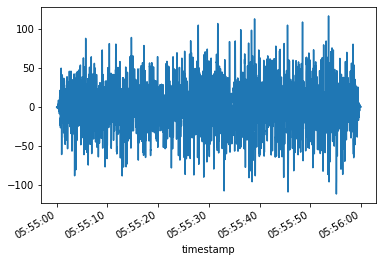

In [ ]:
fig, ax = plt.subplots()
df_noise.plot(legend=False, ax=ax)
plt.show()

In [ ]:
training_mean = df_noise1.mean()
training_std = df_noise1.std()
df_training_value = (df_noise1 - training_mean) / training_std
print("Number of training samples:", len(df_training_value))

Number of training samples: 10000


In [ ]:
TIME_STEPS = 100

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_training_value.values)
print("Training input shape: ", x_train.shape)

Training input shape:  (9900, 100, 1)


In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 50, 32)            256       
_________________________________________________________________
dropout_20 (Dropout)         (None, 50, 32)            0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 25, 16)            3600      
_________________________________________________________________
conv1d_transpose_30 (Conv1DT (None, 50, 16)            1808      
_________________________________________________________________
dropout_21 (Dropout)         (None, 50, 16)            0         
_________________________________________________________________
conv1d_transpose_31 (Conv1DT (None, 100, 32)           3616      
_________________________________________________________________
conv1d_transpose_32 (Conv1DT (None, 100, 1)          

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)


Epoch 1/50
70/70 [==============================] - 3s 35ms/step - loss: 0.3924 - val_loss: 0.1284
Epoch 2/50
70/70 [==============================] - 2s 31ms/step - loss: 0.1183 - val_loss: 0.0706
Epoch 3/50
70/70 [==============================] - 2s 31ms/step - loss: 0.0842 - val_loss: 0.0573
Epoch 4/50
70/70 [==============================] - 2s 31ms/step - loss: 0.0725 - val_loss: 0.0496
Epoch 5/50
70/70 [==============================] - 2s 31ms/step - loss: 0.0626 - val_loss: 0.0410
Epoch 6/50
70/70 [==============================] - 2s 31ms/step - loss: 0.0535 - val_loss: 0.0363
Epoch 7/50
70/70 [==============================] - 2s 31ms/step - loss: 0.0471 - val_loss: 0.0354
Epoch 8/50
70/70 [==============================] - 2s 31ms/step - loss: 0.0429 - val_loss: 0.0419
Epoch 9/50
70/70 [==============================] - 2s 31ms/step - loss: 0.0397 - val_loss: 0.0424
Epoch 10/50
70/70 [==============================] - 2s 31ms/step - loss: 0.0368 - val_loss: 0.0431
Epoch 11/

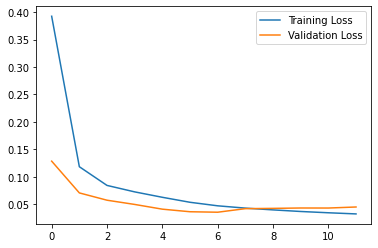

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

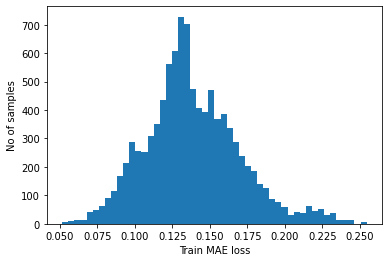

Reconstruction error threshold:  0.254575586849


In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

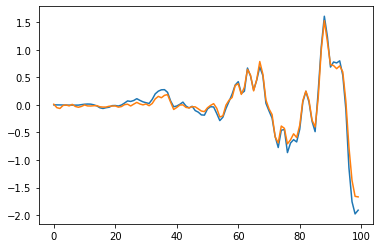

In [ ]:
# Checking how the first sequence is learnt
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()

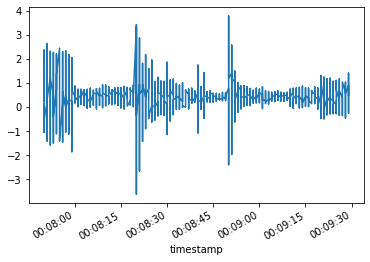

Test input shape:  (9900, 100, 1)


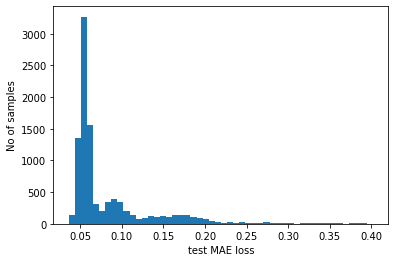

Number of anomaly samples:  176
Indices of anomaly samples:  (array([2968, 2970, 2972, 2973, 2974, 2975, 2976, 2977, 2978, 2979, 2980,
       2981, 2982, 2983, 2984, 2985, 2986, 2987, 2988, 2989, 2990, 2991,
       2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999, 3000, 3001, 3002,
       3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010, 3012, 3013, 3016,
       3017, 3018, 3020, 3022, 3024, 3034, 3035, 3036, 3038, 3040, 3041,
       3042, 3043, 3044, 5966, 5967, 5969, 5970, 5971, 5972, 5973, 5974,
       5975, 5976, 5977, 5978, 5979, 5980, 5981, 5982, 5983, 5984, 5985,
       5986, 5987, 5988, 5989, 5990, 5991, 5992, 5993, 5994, 5995, 5996,
       5997, 5998, 5999, 6000, 6001, 6002, 6003, 6004, 6005, 6006, 6007,
       6008, 6009, 6010, 6011, 6012, 6013, 6014, 6015, 6016, 6017, 6018,
       6019, 6020, 6021, 6022, 6023, 6024, 6025, 6026, 6027, 6028, 6029,
       6030, 6031, 6032, 6033, 6034, 6035, 6036, 6037, 6038, 6039, 6040,
       6041, 6042, 6043, 6044, 6045, 6046, 6047, 6048, 6049, 6

In [ ]:
df_test_value = (df_daily_jumpsup1 - training_mean) / training_std
fig, ax = plt.subplots()
df_test_value.plot(legend=False, ax=ax)
plt.show()

# Create sequences from test values.
x_test = create_sequences(df_test_value.values)
print("Test input shape: ", x_test.shape)

# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

In [ ]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_test_value) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

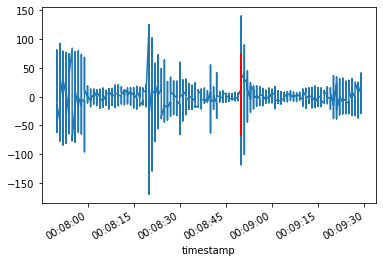

In [ ]:
df_subset = df_daily_jumpsup1.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()

In [ ]:
!git clone https://github.com/arunpalaniappan/TadGAN.git

Cloning into 'TadGAN'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 45 (delta 15), reused 35 (delta 8), pack-reused 0
Unpacking objects: 100% (45/45), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

drive  sample_data  TadGAN


In [ ]:
!rm -rf TadGAN